# 泰坦尼克号-从灾难中学习机器学习

## Introduce

<b/>乘客信息表</b>
    <table border="1" cellpadding="10" cellspacing="0">
        <thead>
            <tr>
                <th>字段名</th>
                <th>说明</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>PassengerId</td>
                <td>乘客编号</td>
            </tr>
            <tr>
                <td>Survived</td>
                <td>是否生还（1 表示生还，0 表示未生还）</td>
            </tr>
            <tr>
                <td>Pclass</td>
                <td>船舱等级（1 等舱，2 等舱，3 等舱）</td>
            </tr>
            <tr>
                <td>Name</td>
                <td>姓名</td>
            </tr>
            <tr>
                <td>Sex</td>
                <td>性别</td>
            </tr>
            <tr>
                <td>Age</td>
                <td>年龄</td>
            </tr>
            <tr>
                <td>SibSp</td>
                <td>船上兄弟姐妹或配偶的数量</td>
            </tr>
            <tr>
                <td>Parch</td>
                <td>船上父母或子女的数量</td>
            </tr>
            <tr>
                <td>Ticket</td>
                <td>票号</td>
            </tr>
            <tr>
                <td>Fare</td>
                <td>票价</td>
            </tr>
            <tr>
                <td>Cabin</td>
                <td>舱位号</td>
            </tr>
            <tr>
                <td>Embarked</td>
                <td>登船港口（C = Cherbourg（瑟堡），Q = Queenstown（皇后镇），S = Southampton（南安普顿））</td>
            </tr>
        </tbody>
    </table>

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Read Data

In [205]:
df = pd.read_csv('./data/train.csv')

In [206]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [207]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## EDA

### 1. 不同性别的生存率

In [208]:
survival_rate =  df[df['Sex'] == 'female']['Survived'].mean(), df[df['Sex'] == 'male']['Survived'].mean()
peoples = df['Sex'].value_counts()
print(f'survival_rate: female {survival_rate[0] * 100:.2f}% \t male {survival_rate[1] * 100:.2f}%')
peoples

survival_rate: female 74.20% 	 male 18.89%


Sex
male      577
female    314
Name: count, dtype: int64

> 女性的存活率更高

### 2. 不同年龄段的生存率

In [209]:
age_df = df.dropna(subset='Age')

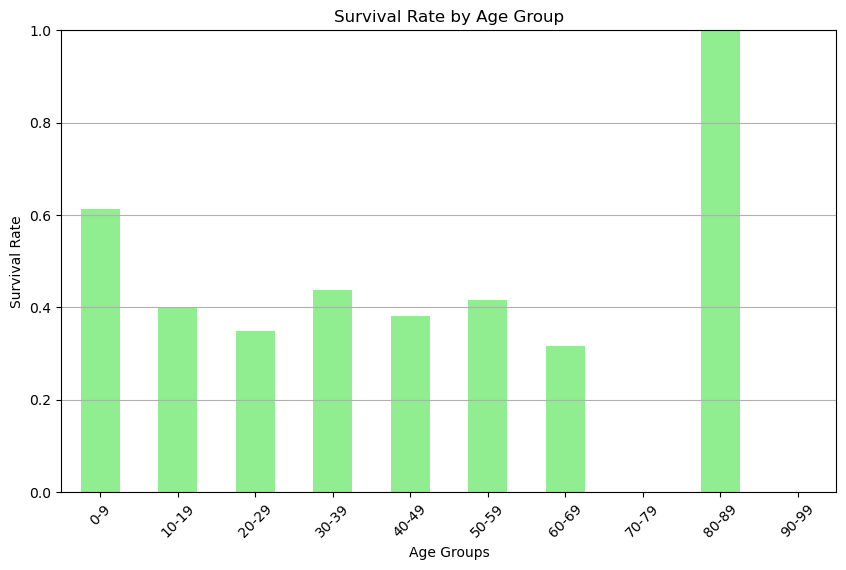

In [210]:
bins = range(0, 101, 10)  # 0到100岁，每10岁一个分组
labels = [f'{i}-{i+9}' for i in bins[:-1]]  # 生成标签，如 '0-9', '10-19', 等
age_df['Age_Group'] = pd.cut(age_df['Age'], bins=bins, labels=labels, right=False)

age_grouped = age_df.groupby('Age_Group').agg(
    Total=('Survived', 'size'),
    Survived=('Survived', 'sum')
)

age_grouped['Survival_Rate'] = age_grouped['Survived'] / age_grouped['Total']

plt.figure(figsize=(10, 6))
age_grouped['Survival_Rate'].plot(kind='bar', color='lightgreen')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.ylim(0, 1)  # 设置 y 轴范围为 0 到 1
plt.show()

> 儿童和老人的存活率更高

### 3. 不同票价人群的存活率

            Total  Survived  Survival_Rate
Fare_Group                                
0-100         838       303       0.361575
100-200        33        25       0.757576
200-300        17        11       0.647059
300-400         0         0            NaN
400-500         0         0            NaN
500-600         3         3       1.000000


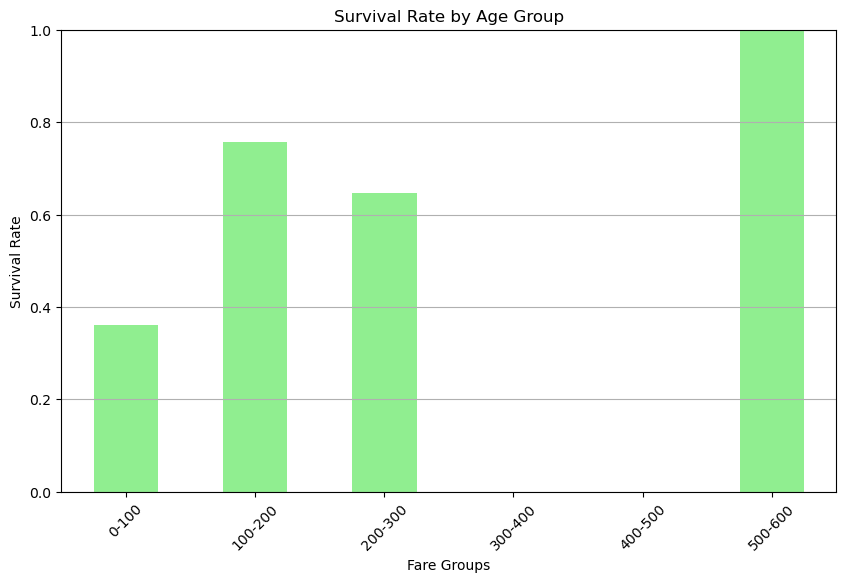

In [211]:
fare_df = df.copy()
bins = range(0, 601, 100)  
labels = [f'{i}-{i+100}' for i in bins[:-1]]  
# print(labels)
fare_df['Fare_Group'] = pd.cut(fare_df['Fare'], bins=bins, labels=labels, right=False)

fare_grouped = fare_df.groupby('Fare_Group').agg(
    Total=('Survived', 'size'),
    Survived=('Survived', 'sum')
)

fare_grouped['Survival_Rate'] = fare_grouped['Survived'] / fare_grouped['Total']
print(fare_grouped)
plt.figure(figsize=(10, 6))
fare_grouped['Survival_Rate'].plot(kind='bar', color='lightgreen')
plt.title('Survival Rate by Age Group')
plt.xlabel('Fare Groups')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.ylim(0, 1)  # 设置 y 轴范围为 0 到 1
plt.show()

> 票价越高, 往往生存率也越高

### 4. 不同登船港口人群的存活率

In [212]:
grouped = df.groupby('Embarked').agg(
    Total=('Survived', 'size'),  # 计算每个组的总人数
    Survived=('Survived', 'sum')  # 计算每个组的存活人数
)

grouped['Survival_Rate'] = grouped['Survived'] / grouped['Total']  # 计算存活率

# 打印分组统计结果
print(grouped[['Total', 'Survived', 'Survival_Rate']])

          Total  Survived  Survival_Rate
Embarked                                
C           168        93       0.553571
Q            77        30       0.389610
S           644       217       0.336957


> C 港登船的人群存活率更高

### 5. 不同船舱等级的存活率

In [213]:
grouped = df.groupby('Pclass').agg(
    Total=('Survived', 'size'),  # 计算每个组的总人数
    Survived=('Survived', 'sum')  # 计算每个组的存活人数
)

grouped['Survival_Rate'] = grouped['Survived'] / grouped['Total']  # 计算存活率

# 打印分组统计结果
print(grouped[['Total', 'Survived', 'Survival_Rate']])

        Total  Survived  Survival_Rate
Pclass                                
1         216       136       0.629630
2         184        87       0.472826
3         491       119       0.242363


> 越是上等的舱, 存活率越高

### 6. 家庭成员数量和存活率之间的关系

In [214]:
_df = df.copy()
_df['family_size'] = df['SibSp'] + df['Parch'] + 1   # 家庭成员数量
grouped = _df.groupby('family_size').agg(
    Total=('Survived', 'size'),  # 计算每个组的总人数
    Survived=('Survived', 'sum')  # 计算每个组的存活人数
)

grouped['Survival_Rate'] = grouped['Survived'] / grouped['Total']  # 计算存活率

# 打印分组统计结果
print(grouped[['Total', 'Survived', 'Survival_Rate']])

             Total  Survived  Survival_Rate
family_size                                
1              537       163       0.303538
2              161        89       0.552795
3              102        59       0.578431
4               29        21       0.724138
5               15         3       0.200000
6               22         3       0.136364
7               12         4       0.333333
8                6         0       0.000000
11               7         0       0.000000


> 家庭成员人数偏高或偏低的人, 存活率偏低

## FE (Feature Engineering)

### 1. 类型转换

In [215]:
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')
df = pd.get_dummies(df, columns=['Pclass'], prefix='Pclass')
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})

In [216]:
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,True,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,False,True,True,False,False
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,False,False,True,False,False,True


### 2. 特征组合

In [217]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1   # 家庭成员数量
df['isAlone'] = df['family_size'] == 1

### 3. 处理缺失数据 

In [218]:
df.isnull().sum()

PassengerId      0
Survived         0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Pclass_1         0
Pclass_2         0
Pclass_3         0
family_size      0
isAlone          0
dtype: int64

#### 尝试构建模型, 预测缺失的年龄

In [219]:
train_df, test_df = df[~df['Age'].isnull()], df[df['Age'].isnull()]

In [220]:
train_df.shape, test_df.shape

((714, 18), (177, 18))

In [221]:
featue_names = [
    'SibSp', 'Parch', 'Fare', 'family_size', 'isAlone', 'Sex', 'Survived',
    'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'
                ]
train_X, train_y = train_df[featue_names].values, train_df['Age'].values
test_X = test_df[featue_names].values

In [222]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def age_dropna(X_train, y_train, X_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    knn = KNeighborsRegressor(n_neighbors=7, weights='distance')
    # 训练模型
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    return y_pred

In [223]:
X_t, X_vaild, y_t, y_vaild = train_test_split(train_X, train_y, test_size=0.1)

In [224]:
y_pred = age_dropna(X_t, y_t, X_vaild)
mae = mean_absolute_error(y_pred, y_vaild)
mae

9.864681674706393

In [225]:
df.loc[df['PassengerId'].isin(test_df['PassengerId']), 'Age'] = age_dropna(train_X, train_y, test_X)

In [226]:
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,family_size,isAlone
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,False,True,2,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,True,False,False,True,False,False,2,False
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,False,False,True,1,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,False,True,True,False,False,2,False
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,False,False,True,False,False,True,1,True


### 4. 归一化

In [227]:
X = df[[ 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'family_size', 'isAlone',
        'Embarked_C', 'Embarked_S', 'Embarked_Q', 'Pclass_1', 'Pclass_2', 'Pclass_3'
        ]].values
y = df['Survived'].values

In [228]:
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

In [229]:
X_scaler[0]

array([0.        , 0.27117366, 0.125     , 0.        , 0.01415106,
       0.1       , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        ])

In [230]:
X_scaler.shape, y.shape

((891, 13), (891,))

In [231]:
from collections import defaultdict
models = defaultdict(list)

## Model

In [232]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,  cross_val_score, KFold


### 1. Tree Model

#### Random Forest

In [233]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X_scaler):
    X_train, X_test = X_scaler[train_index], X_scaler[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # 创建并训练模型
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    score = accuracy_score(model.predict(X_test), y_test)
    # 将训练好的模型添加到模型列表
    models['RF'].append(model)
    scores.append(score)    

In [234]:
print(f"准确率:{np.array(scores).mean():.2f}")

准确率:0.82


#### XGBoost

In [235]:
model = XGBClassifier()

In [236]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X_scaler):
    X_train, X_test = X_scaler[train_index], X_scaler[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # 创建并训练模型
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    score = accuracy_score(model.predict(X_test), y_test)
    # 将训练好的模型添加到模型列表
    models['XGB'].append(model)
    scores.append(score)    

In [237]:
print(f"准确率:{np.array(scores).mean():.2f}")

准确率:0.82


### 2. Linear Model

In [238]:
from sklearn.linear_model import LogisticRegression

In [239]:
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)

In [240]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X_scaler):
    X_train, X_test = X_scaler[train_index], X_scaler[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # 创建并训练模型
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    score = accuracy_score(model.predict(X_test), y_test)
    # 将训练好的模型添加到模型列表
    models['Logistic'].append(model)
    scores.append(score)    

In [241]:
print(f"准确率:{np.array(scores).mean():.2f}")

准确率:0.82


### 3. ANN Model

In [242]:
from sklearn.neural_network import MLPClassifier

In [243]:
model = MLPClassifier(hidden_layer_sizes=(20, 9),  # 两个隐藏层，每层10个神经元
                    max_iter=2000,               # 最大迭代次数
                    random_state=42)

In [244]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X_scaler):
    X_train, X_test = X_scaler[train_index], X_scaler[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # 创建并训练模型
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    score = accuracy_score(model.predict(X_test), y_test)
    # 将训练好的模型添加到模型列表
    models['Logistic'].append(model)
    scores.append(score)    

In [245]:
print(f"准确率:{np.array(scores).mean():.2f}")

准确率:0.83


### 4. 多模型集成

In [246]:
X_scaler

array([[0.        , 0.27117366, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.4722292 , 0.125     , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.32143755, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.28486172, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.32143755, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.39683338, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [247]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=42)

In [249]:
rf_clf = RandomForestClassifier(n_estimators=100)
xgb_clf = XGBClassifier()
logistic_clf = LogisticRegression(max_iter=200)   # 逻辑回归
mlp = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=2000, random_state=42)

In [250]:
voting_clf = VotingClassifier(estimators=[
    ('RF', rf_clf),
    ('XGB', xgb_clf),
    ('logistic', logistic_clf),
    ('MLP', mlp)
], voting='hard') 

In [251]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('RF', RandomForestClassifier()),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interact...
                                            max_cat_to_onehot=None,
                  

In [252]:
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [253]:
accuracy

0.8212290502793296

In [254]:
report = classification_report(y_test, y_pred)
print(f'准确率: {accuracy:.4f}')
print('分类报告:')
print(report)

准确率: 0.8212
分类报告:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



## Submit

In [255]:
df_test = pd.read_csv('./data/test.csv')

In [256]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [257]:
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Pclass'], prefix='Pclass')
df_test['Sex'] = df_test['Sex'].map({'female': 1, 'male': 0})

In [258]:
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

In [259]:
df_test['family_size'] = df_test['SibSp'] + df_test['Parch'] + 1   # 家庭成员数量
df_test['isAlone'] = df_test['family_size'] == 1

In [260]:
df_test.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,family_size,isAlone
0,892,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,False,True,False,False,False,True,1,True
1,893,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,False,False,True,False,False,True,2,False
2,894,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,False,True,False,False,True,False,1,True
3,895,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,False,False,True,False,False,True,1,True
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,False,False,True,False,False,True,3,False


In [261]:
train_test_df, test_test_df = df_test[~df_test['Age'].isnull()], df_test[df_test['Age'].isnull()]
featue_names = [
    'SibSp', 'Parch', 'Fare', 'family_size', 'isAlone', 'Sex',
    'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'
                ]
train_X, train_y = train_test_df[featue_names].values, train_test_df['Age'].values
test_X = test_test_df[featue_names].values

In [262]:
df_test.loc[df_test['PassengerId'].isin(test_test_df['PassengerId']), 'Age'] = age_dropna(train_X, train_y, test_X)

In [263]:
X = df[[ 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'family_size', 'isAlone',
        'Embarked_C', 'Embarked_S', 'Embarked_Q', 'Pclass_1', 'Pclass_2', 'Pclass_3'
        ]].values
y = df['Survived'].values

In [264]:
X_test = df_test[[ 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',  'family_size', 'isAlone',
        'Embarked_C', 'Embarked_S', 'Embarked_Q', 'Pclass_1', 'Pclass_2', 'Pclass_3'
        ]].values

In [265]:
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [266]:
voting_clf = VotingClassifier(estimators=[
    ('RF', rf_clf),
    ('XGB', xgb_clf),
    ('logistic', logistic_clf),
    ('MLP', mlp)
], voting='hard') 
voting_clf.fit(X_scaler, y)

VotingClassifier(estimators=[('RF', RandomForestClassifier()),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interact...
                                            max_cat_to_onehot=None,
                  

In [267]:
y_pred = voting_clf.predict(X_test_scaled)

In [269]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred})
output.to_csv('./data/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [1]:
!kaggle competitions submit -c titanic -f ./data/submission.csv -m "异质集成 - 加入特征工程, 使用KNN预测缺失年龄. 同时对特征进行了归一化处理"

100%|██████████████████████████████████████| 2.77k/2.77k [00:00<00:00, 3.06kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques